# Pytorch Tutorial

Pytorch is a popular deep learning framework and it's easy to get started.

In [4]:
import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
import time

BATCH_SIZE = 128
NUM_EPOCHS = 10

First, we read the mnist data, preprocess them and encapsulate them into dataloader form.

In [5]:
# preprocessing
normalize = transforms.Normalize(mean=[.5], std=[.5])
transform = transforms.Compose([transforms.ToTensor(), normalize])

# download and load the data
train_dataset = torchvision.datasets.MNIST(root='./mnist/', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./mnist/', train=False, transform=transform, download=False)

# encapsulate them into dataloader form
train_loader = data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
test_loader = data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)

Then, we define the model, object function and optimizer that we use to classify.

In [6]:
import torch.nn.functional as F
from torch import optim

class SimpleNet(nn.Module):
# TODO:define model
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) 
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, 5)  
        self.fc1   = nn.Linear(16*4*4, 120) 
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)
        
        
    def forward(self, x): 
        x = self.pool(F.relu(self.conv1(x))) 
        x = self.pool(F.relu(self.conv2(x))) 
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)      
        return x
    
model = SimpleNet().cuda()

# TODO:define loss function and optimiter
criterion = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.99))

Next, we can start to train and evaluate!

In [8]:
# train and evaluate

import numpy as np

Accuracy_list1 = np.ones(10)
Accuracy_list2 = np.ones(10)

tnum = 0
anum = 0
for images, labels in tqdm(train_loader):
    images=images.cuda()
    labels=labels.cuda()
    output = model(images)
    outputlabel=output.max(1)[1]
    tnum=tnum+(outputlabel==labels).sum()
    anum=anum+(labels!=-9).sum()
accuracy=tnum/anum
print(accuracy.item())
tnum = 0
anum = 0
for images, labels in tqdm(test_loader):
    images=images.cuda()
    labels=labels.cuda()
    output = model(images)
    outputlabel=output.max(1)[1]
    tnum=tnum+(outputlabel==labels).sum()
    anum=anum+(labels!=-9).sum()
accuracy=tnum/anum
print(accuracy.item())
    
    
for epoch in range(NUM_EPOCHS):
    print("epoch:")
    print(epoch)
    for images, labels in tqdm(train_loader):
        # TODO:forward + backward + optimize
        images=images.cuda()
        labels=labels.cuda()
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
    tnum=0
    anum=0
    for images, labels in tqdm(train_loader):
        images=images.cuda()
        labels=labels.cuda()
        output = model(images)
        outputlabel=output.max(1)[1]
        tnum=tnum+(outputlabel==labels).sum()
        anum=anum+(labels!=-9).sum()
    accuracy=tnum/anum
    print(accuracy.item())
    Accuracy_list1[epoch]=(accuracy.item())
    tnum = 0
    anum = 0
    for images, labels in tqdm(test_loader):
        images=images.cuda()
        labels=labels.cuda()
        output = model(images)
        outputlabel=output.max(1)[1]
        tnum=tnum+(outputlabel==labels).sum()
        anum=anum+(labels!=-9).sum()
    accuracy=tnum/anum
    print(accuracy.item())
    Accuracy_list2[epoch]=(accuracy.item())

    # evaluate
    # TODO:calculate the accuracy using traning and testing dataset
    
    
    
    


 10%|█         | 8/78 [00:00<00:00, 75.23it/s]

0.11149505525827408


  0%|          | 1/468 [00:00<00:52,  8.91it/s]

0.11007612198591232
epoch:
0


  9%|▉         | 7/78 [00:00<00:01, 67.01it/s]

0.9649773240089417


  1%|▏         | 7/468 [00:00<00:07, 61.57it/s]

0.9704527258872986
epoch:
1


 10%|█         | 8/78 [00:00<00:00, 74.59it/s]

0.9804520606994629


  1%|▏         | 7/468 [00:00<00:07, 60.51it/s]

0.9809695482254028
epoch:
2


 10%|█         | 8/78 [00:00<00:00, 72.92it/s]

0.9834902286529541


  1%|▏         | 7/468 [00:00<00:07, 62.11it/s]

0.9841746687889099
epoch:
3


 10%|█         | 8/78 [00:00<00:00, 75.69it/s]

0.9897168874740601


  1%|▏         | 7/468 [00:00<00:07, 60.49it/s]

0.9872796535491943
epoch:
4


 10%|█         | 8/78 [00:00<00:00, 74.97it/s]

0.9922542572021484


  1%|▏         | 7/468 [00:00<00:07, 60.00it/s]

0.9904847741127014
epoch:
5


 10%|█         | 8/78 [00:00<00:00, 70.99it/s]

0.9935396909713745


  1%|▏         | 7/468 [00:00<00:07, 63.82it/s]

0.9909855723381042
epoch:
6


 10%|█         | 8/78 [00:00<00:00, 71.00it/s]

0.9932558536529541


  1%|▏         | 7/468 [00:00<00:07, 61.03it/s]

0.9884815812110901
epoch:
7


 10%|█         | 8/78 [00:00<00:00, 71.94it/s]

0.9923043251037598


  1%|▏         | 6/468 [00:00<00:08, 54.73it/s]

0.9897836446762085
epoch:
8


 10%|█         | 8/78 [00:00<00:00, 76.40it/s]

0.9963775277137756


  1%|▏         | 7/468 [00:00<00:07, 61.57it/s]

0.9914863705635071
epoch:
9


 10%|█         | 8/78 [00:00<00:00, 74.93it/s]

0.9966613054275513


100%|██████████| 78/78 [00:01<00:00, 73.10it/s]

0.9918870329856873


#### Q5:
Please print the training and testing accuracy.

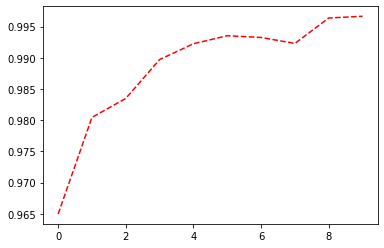

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 10, 1)

plt.plot(x,Accuracy_list1,'r--')

plt.show()

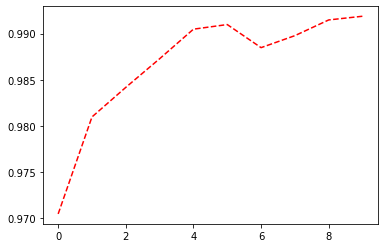

In [10]:
plt.plot(x,Accuracy_list2,'r--')

plt.show()